# **Sentiment Analysis of Electric Vehicles**

## Importing Libraries

In [ ]:
import pandas as pd
from textblob import TextBlob

## Importing Dataset and Labelling

In [ ]:
# Read data from Excel file
data = pd.read_excel('EV-Review.xlsx')

# Assuming your dataset has a column named 'Review' containing the reviews
reviews = data['Review'].tolist()

# Function to perform sentiment analysis and assign labels
def analyze_sentiment(review):
    blob = TextBlob(str(review))  # Ensure review is converted to string
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return "positive"
    elif sentiment_score < 0:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to each review
data['Sentiment'] = data['Review'].apply(analyze_sentiment)

# Save the labeled dataset back to Excel
data.to_excel('EV_dataset.xlsx', index=False)  # Replace 'labeled_dataset.xlsx' with desired output file path

In [ ]:
data = pd.read_excel('EV_dataset.xlsx')

In [ ]:
df = pd.DataFrame(data)

## Exploratory Data Analysis

In [ ]:
df.head()

,Title,Review,Review_by,Time,URL,Sentiment
0,Very very Delayed Delivery of Car,This is a safety car. \nBut the only issue whi...,Ranjan Kumar Meher,3 years ago,https://www.carwale.com/mahindra-cars/xuv300/u...,negative
1,Disturbing noise from brake and suspension,After 10 days of purchase.. Sound started comi...,Jumpe Maro,4 years ago,https://www.carwale.com/mahindra-cars/xuv300/u...,positive
2,XUV300 has Clutch Issues.,After driving a few 100 kilometres I found the...,Risabh,4 years ago,https://www.carwale.com/mahindra-cars/xuv300/u...,negative
3,Amazing machine with a great value for money,I bought this car 3 months back after doing 6 ...,Anurag sharma,2 years ago,https://www.carwale.com/mahindra-cars/xuv300/u...,positive
4,Noise issue in xuv300 do not buy,This car has noise from front axle on bumpy ro...,pulkit chauhan,4 years ago,https://www.carwale.com/mahindra-cars/xuv300/u...,negative


In [ ]:
df.shape

(2107, 6)

In [ ]:
df.isnull().sum()

Title          0
Review       803
Review_by      0
Time           1
URL            0
Sentiment      0
dtype: int64

In [ ]:
df.shape

(2107, 6)

In [ ]:
df['Sentiment'].value_counts()

Sentiment
positive    1209
neutral      824
negative      74
Name: count, dtype: int64

In [ ]:
df.head(2)

,Title,Review,Review_by,Time,URL,Sentiment
0,Very very Delayed Delivery of Car,This is a safety car. \nBut the only issue whi...,Ranjan Kumar Meher,3 years ago,https://www.carwale.com/mahindra-cars/xuv300/u...,negative
1,Disturbing noise from brake and suspension,After 10 days of purchase.. Sound started comi...,Jumpe Maro,4 years ago,https://www.carwale.com/mahindra-cars/xuv300/u...,positive


In [ ]:
missing_values = df[df['Review'].isnull()]

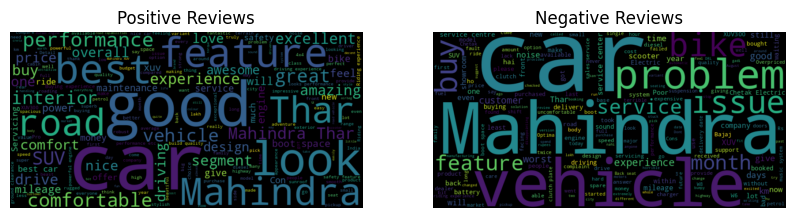

In [ ]:
# @title Word Cloud by Sentiment

import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive_words = ' '.join(df[df['Sentiment'] == 'positive']['Review'].tolist())
negative_words = ' '.join(df[df['Sentiment'] == 'negative']['Review'].tolist())
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_words)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
_ = plt.axis('off')

<Axes: xlabel='Review_by'>

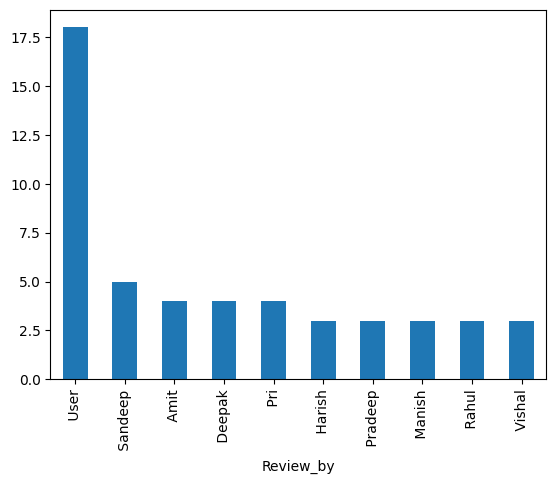

In [ ]:
# @title Top Positive Reviewers

df[df['Sentiment'] == 'positive'].groupby('Review_by').size().sort_values(ascending=False).head(10).plot(kind='bar')

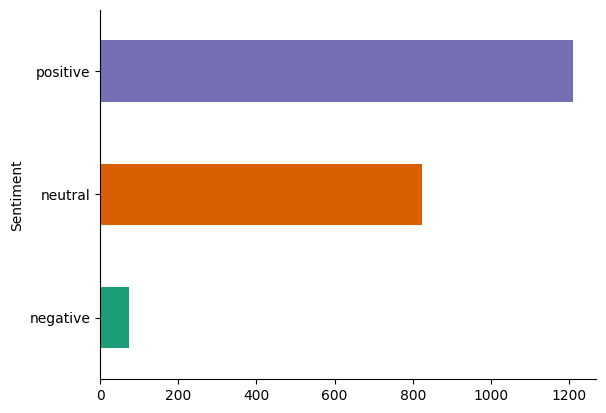

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Time'>

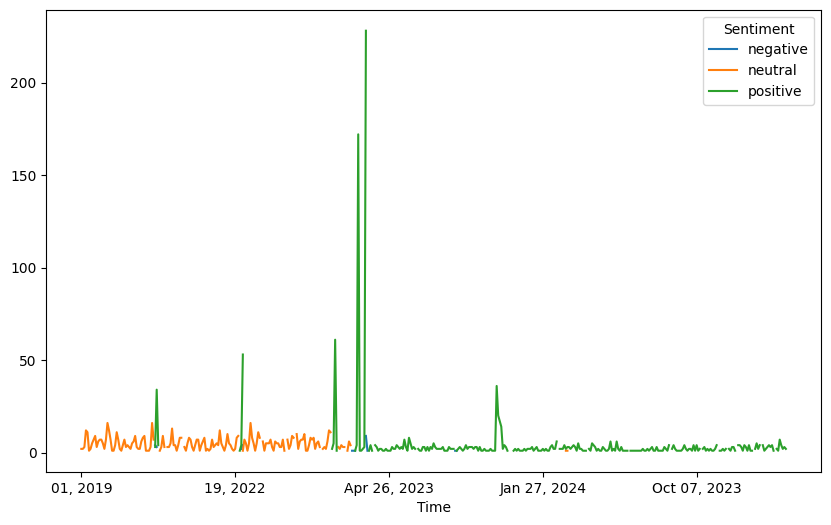

In [ ]:
# @title Sentiment over Time
df.groupby(['Time', 'Sentiment']).size().unstack().plot(kind='line', figsize=(10, 6))

In [ ]:
df['Sentiment'] = df['Sentiment'].replace('neutral', 1)
df['Sentiment'] = df['Sentiment'].replace('negative',0 )
df['Sentiment'] = df['Sentiment'].replace('positive', 2)

In [ ]:
## Get the Independent Features
X = df.drop('Sentiment', axis=1)

In [ ]:
y= df['Sentiment']

In [ ]:
X.shape

(2107, 5)

In [ ]:
y.shape

(2107,)

## Data Pre-Processing

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import re
from bs4 import BeautifulSoup

### Removing Hashtags

In [ ]:
# Function to clean text data
def clean_text(text):
    if pd.isnull(text):  # Check if text is NaN
        return ''
    text = BeautifulSoup(str(text), 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

# Apply cleaning and language processing to the 'Review' column
df['Review'] = df['Review'].apply(clean_text)
df['URL'] = df['URL'].apply(clean_text)
df['Time'] = df['Time'].apply(clean_text)
df['Title'] = df['Title'].apply(clean_text)

<ipython-input-207-e56d4c9c7398>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(str(text), 'html.parser').get_text()
<ipython-input-207-e56d4c9c7398>:5: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(str(text), 'html.parser').get_text()
<ipython-input-207-e56d4c9c7398>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(str(text), 'html.parser').get_text()


### Tokenization

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

corpus= []
# Function to clean and tokenize text data
def tokenize_text(text):
    tokens = word_tokenize(text)
    user_review = ' '.join(tokens)
    return tokens

# Assuming 'df' is your DataFrame containing 'Review' and 'Title' columns
df['review'] = df['Review'] + df['Title']

# Tokenize the 'review' column
df['review_tokens'] = df['review'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Function for language processing (lemmatization)
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


# Lemmatize the 'review' column
df['review'] = df['review'].apply(lemmatize_text)

In [ ]:
# Create a corpus
corpus = df['review'].tolist()

# Print the first few elements of the corpus to verify
print(corpus[:5])

['this is a safety car but the only issue which i had faced is delayed delivery since last 2 month i wa paid for this car but no delivery of the car even after 2 month customer care of mahindra is giving the worst service the title with you hamesha should be changed to disappoint you hamesha very very delayed delivery of car', 'after 10 day of purchase sound started coming from brake and suspension and door and i complained many time to dealer but in vain they couldnt solve it now it 11th month running still same problemsdisturbing noise from brake and suspension', 'after driving a few 100 kilometre i found the clutch is not working properly during the initial inspection they replaced the master cylinder and now today my clutch plate are gone the vehicle ha done only 5000 km i do not recommend this vehiclexuv300 ha clutch issue', 'i bought this car 3 month back after doing 6 month of research this car is king of sub compact suv great driving experience with good mileage and comfort the

### Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # or choose the appropriate language
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['review'] = df['review'].apply(remove_stopwords)

# Save the preprocessed data to a new Excel file
df.to_excel('preprocessed_dataset.xlsx', index=False)

In [ ]:
for i in range(10):
    print(df['review'][i+1])

10 day purchase sound started coming brake suspension door complained many time dealer vain couldnt solve 11th month running still problemsdisturbing noise brake suspension
driving 100 kilometre found clutch working properly initial inspection replaced master cylinder today clutch plate gone vehicle ha done 5000 km recommend vehiclexuv300 ha clutch issue
bought car 3 month back 6 month research car king sub compact suv great driving experience good mileage comfort best part understands indian road speed breaker front look awesome overall great design suggest buy without giving second thoughtamazing machine great value money
car ha noise front axle bumpy road like 78 year old car mahindra say design noise existing car patheticthis visited service centre 4 time injust one month purchasing car delivery date noise wa came back asked said axle wa loosenew car acle loose noise continuesnew car noise poor suspensioj car mini suv segment dont suggest anyone buy carnoise issue xuv300 buy
huge i

In [ ]:
#corpus

In [ ]:
df.head()

,Title,Review,Review_by,Time,URL,Sentiment,review,review_tokens
0,very very delayed delivery of car,this is a safety car \nbut the only issue whic...,Ranjan Kumar Meher,3 years ago,httpswwwcarwalecommahindracarsxuv300userreview...,0,safety car issue faced delayed delivery since ...,"[this, is, a, safety, car, but, the, only, iss..."
1,disturbing noise from brake and suspension,after 10 days of purchase sound started coming...,Jumpe Maro,4 years ago,httpswwwcarwalecommahindracarsxuv300userreview...,2,10 day purchase sound started coming brake sus...,"[after, 10, days, of, purchase, sound, started..."
2,xuv300 has clutch issues,after driving a few 100 kilometres i found the...,Risabh,4 years ago,httpswwwcarwalecommahindracarsxuv300userreview...,0,driving 100 kilometre found clutch working pro...,"[after, driving, a, few, 100, kilometres, i, f..."
3,amazing machine with a great value for money,i bought this car 3 months back after doing 6 ...,Anurag sharma,2 years ago,httpswwwcarwalecommahindracarsxuv300userreview...,2,bought car 3 month back 6 month research car k...,"[i, bought, this, car, 3, months, back, after,..."
4,noise issue in xuv300 do not buy,this car has noise from front axle on bumpy ro...,pulkit chauhan,4 years ago,httpswwwcarwalecommahindracarsxuv300userreview...,0,car ha noise front axle bumpy road like 78 yea...,"[this, car, has, noise, from, front, axle, on,..."


## Training Model

In [ ]:
#!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
corpus[1]

'after 10 day of purchase sound started coming from brake and suspension and door and i complained many time to dealer but in vain they couldnt solve it now it 11th month running still same problemsdisturbing noise from brake and suspension'

In [ ]:
import numpy as np
c= np.array(corpus)
c.shape

(2107,)

## One Hot Encoding

In [ ]:

 ### Vocabulary size
voc_size=5000

In [ ]:
onehot_repr= [one_hot(words,voc_size) for words in corpus]
onehot_repr

[[583,
  1324,
  2545,
  3981,
  768,
  1094,
  4139,
  3040,
  2589,
  3165,
  793,
  4255,
  2138,
  1324,
  178,
  320,
  3630,
  1973,
  1828,
  4865,
  793,
  4032,
  2475,
  2449,
  583,
  768,
  1094,
  3545,
  320,
  4581,
  4139,
  768,
  1691,
  3538,
  1828,
  4865,
  4550,
  2423,
  4581,
  4447,
  1324,
  4591,
  4139,
  1768,
  535,
  4139,
  3354,
  4766,
  874,
  451,
  3947,
  4422,
  4208,
  229,
  798,
  874,
  451,
  2965,
  2965,
  178,
  320,
  4581,
  768],
 [3538,
  1196,
  2392,
  4581,
  4187,
  1275,
  4533,
  1778,
  4997,
  60,
  1525,
  1432,
  1525,
  2234,
  1525,
  793,
  3411,
  2508,
  3321,
  229,
  1430,
  1094,
  1081,
  4076,
  31,
  505,
  4091,
  4710,
  703,
  4710,
  1243,
  4865,
  1383,
  3005,
  4813,
  3596,
  2820,
  4997,
  60,
  1525,
  1432],
 [3538,
  1333,
  2545,
  612,
  4751,
  3812,
  793,
  2859,
  4139,
  1007,
  1324,
  2221,
  3756,
  632,
  4498,
  4139,
  1195,
  1630,
  31,
  1198,
  4139,
  1713,
  154,
  1525,
  703,
  1

In [ ]:
corpus[1]

'after 10 day of purchase sound started coming from brake and suspension and door and i complained many time to dealer but in vain they couldnt solve it now it 11th month running still same problemsdisturbing noise from brake and suspension'

In [ ]:
onehot_repr[1]

[3538,
 1196,
 2392,
 4581,
 4187,
 1275,
 4533,
 1778,
 4997,
 60,
 1525,
 1432,
 1525,
 2234,
 1525,
 793,
 3411,
 2508,
 3321,
 229,
 1430,
 1094,
 1081,
 4076,
 31,
 505,
 4091,
 4710,
 703,
 4710,
 1243,
 4865,
 1383,
 3005,
 4813,
 3596,
 2820,
 4997,
 60,
 1525,
 1432]

## Using Word2Vec

In [ ]:
sent_length= 20
embedded_docs= pad_sequences(onehot_repr,padding='post',maxlen= sent_length)
print(embedded_docs)

[[1768  535 4139 ...  320 4581  768]
 [1094 1081 4076 ...   60 1525 1432]
 [1007  271 2746 ... 2911 1007 2589]
 ...
 [ 769 3853    0 ...    0    0    0]
 [2307 4581 2749 ...    0    0    0]
 [3781 1077    0 ...    0    0    0]]


In [ ]:
embedded_docs[1]

array([1094, 1081, 4076,   31,  505, 4091, 4710,  703, 4710, 1243, 4865,
       1383, 3005, 4813, 3596, 2820, 4997,   60, 1525, 1432], dtype=int32)

In [ ]:
len(embedded_docs),y.shape

(2107, (2107,))

In [ ]:
final_corpus = df['review'].astype(str).tolist()
df_final= pd.DataFrame()
df_final['review']= final_corpus
df_final['Sentiment']= df['Sentiment'].values
df_final.head()

,review,Sentiment
0,safety car issue faced delayed delivery since ...,0
1,10 day purchase sound started coming brake sus...,2
2,driving 100 kilometre found clutch working pro...,0
3,bought car 3 month back 6 month research car k...,2
4,car ha noise front axle bumpy road like 78 yea...,0


In [ ]:
x= df_final['review']
y= df_final['Sentiment']
x[0]

'safety car issue faced delayed delivery since last 2 month wa paid car delivery car even 2 month customer care mahindra giving worst service title hamesha changed disappoint hamesha delayed delivery car'

In [ ]:
from collections import Counter
Counter(y)

Counter({0: 74, 2: 1209, 1: 824})

## Dividing Data into training and testing

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((2107, 20), (2107,))

In [ ]:
from sklearn.model_selection import train_test_split
# Define the sizes for each set
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Split the data into training and the rest
X_train, X_temp, y_train, y_temp = train_test_split(X_final, y_final, test_size=1-train_size, random_state=42)
# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size/(test_size + val_size), random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 1474
Validation set size: 316
Testing set size: 317


In [ ]:
X_train

array([[1239, 4967, 2670, ...,    0,    0,    0],
       [ 621, 1119, 3947, ..., 1081,  583,   77],
       [2169, 1698, 1525, ...,  539, 3028, 4282],
       ...,
       [ 768, 4766, 2965, ..., 4581, 1333, 1624],
       [2553, 1131, 2842, ..., 2449, 1759, 1901],
       [2449, 1035, 1828, ..., 2273,  222,  768]], dtype=int32)

## **Using LSTM - Deep Learning**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))  # 3 classes:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 20, 40)            200000    
                                                                 
 dropout_1 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_6 (LSTM)               (None, 100)               56400     
                                                                 
 dense_19 (Dense)            (None, 3)                 303       
                                                                 
Total params: 256703 (1002.75 KB)
Trainable params: 256703 (1002.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
24/24 [==============================] - 6s 82ms/step - loss: 0.7370 - accuracy: 0.9003 - val_loss: 0.2350 - val_accuracy: 0.9367
Epoch 2/10
24/24 [==============================] - 1s 33ms/step - loss: 0.2418 - accuracy: 0.9403 - val_loss: 0.1618 - val_accuracy: 0.9620
Epoch 3/10
24/24 [==============================] - 1s 34ms/step - loss: 0.2008 - accuracy: 0.9450 - val_loss: 0.1339 - val_accuracy: 0.9715
Epoch 4/10
24/24 [==============================] - 1s 34ms/step - loss: 0.1617 - accuracy: 0.9464 - val_loss: 0.1231 - val_accuracy: 0.9715
Epoch 5/10
24/24 [==============================] - 1s 34ms/step - loss: 0.1161 - accuracy: 0.9512 - val_loss: 0.1305 - val_accuracy: 0.9684
Epoch 6/10
24/24 [==============================] - 1s 34ms/step - loss: 0.1142 - accuracy: 0.9539 - val_loss: 0.2307 - val_accuracy: 0.9684
Epoch 7/10
24/24 [==============================] - 1s 33ms/step - loss: 0.0717 - accuracy: 0.9579 - val_loss: 0.1884 - val_accuracy: 0.9684
Epoch 8/10
24

In [ ]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 7ms/step


In [ ]:
y_pred[1]

array([7.3779069e-05, 7.0143135e-05, 9.9985623e-01], dtype=float32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the class labels
label_encoder.fit(y_test)

# Transform the class labels
y_test_encoded = label_encoder.transform(y_test)

# Make predictions and convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test_encoded, y_pred_labels)
accuracy = accuracy_score(y_test_encoded, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[  1   0   7]
 [  0 111   2]
 [  1   0 195]]
Accuracy: 0.9684542586750788


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_encoded, y_pred_labels, average='weighted')

# Calculate recall
recall = recall_score(y_test_encoded, y_pred_labels, average='weighted')
# Calculate F1-score
f1 = f1_score(y_test_encoded, y_pred_labels, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9601039153831881
Recall: 0.9684542586750788
F1-score: 0.9611705723298786


Confusion matrix


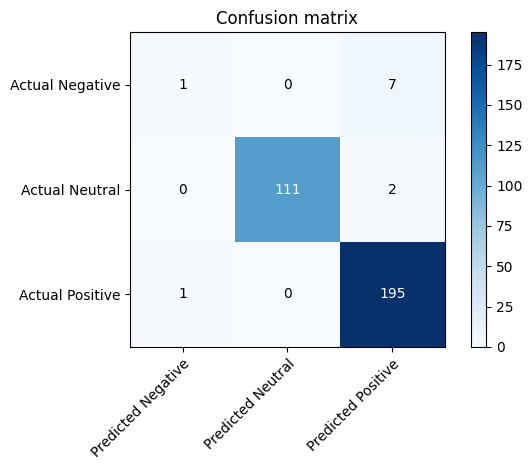

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    print('Confusion matrix')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # Label ticks with the respective list entries
           xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
           yticklabels=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
           title=title)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_labels, classes=np.array([-1, 0, 1]),
                      title='Confusion matrix')


plt.show()

## **Using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Model Evaluation

In [ ]:
# Predictions on the validation set
val_predictions = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy:", val_accuracy)

# Predictions on the testing set
test_predictions = nb_classifier.predict(X_test)


# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test_encoded, test_predictions)
print("Testing set accuracy:", test_accuracy)

Validation set accuracy: 0.7658227848101266
Testing set accuracy: 0.7255520504731862


In [ ]:
# Compute the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test,test_predictions)
accuracy = accuracy_score(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  4   0   4]
 [  1 110   2]
 [ 79   1 116]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_encoded,test_predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test_encoded, test_predictions, average='weighted')
# Calculate F1-score
f1 = f1_score(y_test_encoded,test_predictions, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9423457100966539
Recall: 0.7255520504731862
F1-score: 0.8033801442362138


Confusion matrix


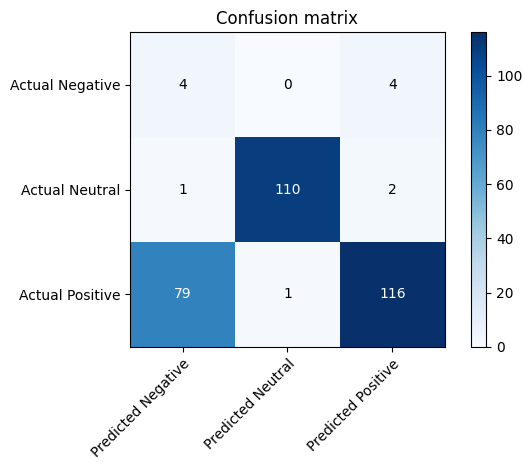

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test,test_predictions , classes=np.array([-1, 0, 1]),
                      title='Confusion matrix')

plt.show()

# Bidirectional LSTM Model

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
voc_size, embedding_vector_features

(5000, 40)

In [ ]:
model1= Sequential()
model1.add(Embedding(voc_size, embedding_vector_features,input_length= sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dense(3,activation= 'softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 20, 40)            200000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 3)                 603       
                                                                 
Total params: 313403 (1.20 MB)
Trainable params: 313403 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model1.fit(X_train,y_train, validation_data= (X_test,y_test),epochs= 10,batch_size=32)


Epoch 1/10
47/47 [==============================] - 7s 50ms/step - loss: 0.4640 - accuracy: 0.9254 - val_loss: 0.1644 - val_accuracy: 0.9685
Epoch 2/10
47/47 [==============================] - 2s 32ms/step - loss: 0.2438 - accuracy: 0.9376 - val_loss: 0.1237 - val_accuracy: 0.9653
Epoch 3/10
47/47 [==============================] - 2s 32ms/step - loss: 0.1177 - accuracy: 0.9518 - val_loss: 0.1171 - val_accuracy: 0.9653
Epoch 4/10
47/47 [==============================] - 1s 31ms/step - loss: 0.0487 - accuracy: 0.9864 - val_loss: 0.1586 - val_accuracy: 0.9590
Epoch 5/10
47/47 [==============================] - 2s 51ms/step - loss: 0.0109 - accuracy: 0.9986 - val_loss: 0.1955 - val_accuracy: 0.9590
Epoch 6/10
47/47 [==============================] - 2s 37ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.2583 - val_accuracy: 0.9432
Epoch 7/10
47/47 [==============================] - 1s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2386 - val_accuracy: 0.9558
Epoch 8/10
47

In [ ]:
y_pred1= model1.predict(X_test)

10/10 [==============================] - 1s 15ms/step


In [ ]:
y_pred1= np.where(y_pred1>= 0.5,1,0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions and convert them to class labels
y_pred_label = np.argmax(y_pred1, axis=1)

# Compute the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test_encoded, y_pred_label)
accuracy = accuracy_score(y_test_encoded, y_pred_label)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[  3   0   5]
 [  0 111   2]
 [  7   0 189]]
Accuracy: 0.9558359621451105


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_encoded, y_pred_label, average='weighted')

# Calculate recall
recall = recall_score(y_test_encoded, y_pred_label, average='weighted')
# Calculate F1-score
f1 = f1_score(y_test_encoded, y_pred_label, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9602523659305993
Recall: 0.9558359621451105
F1-score: 0.957910845726303


Confusion matrix


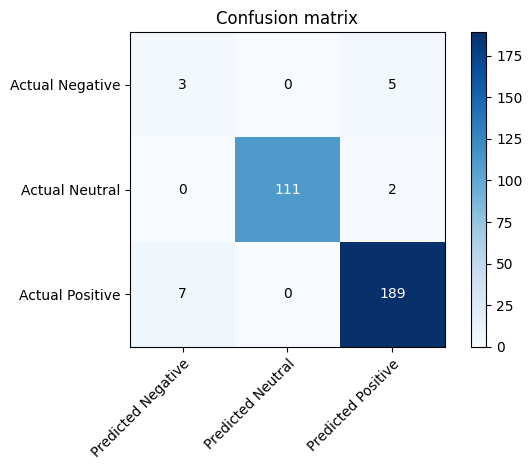

In [ ]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_label, classes=np.array([-1, 0, 1]),
                      title='Confusion matrix')

plt.show()

## RNN

In [ ]:
!pip install tensorflow-addons

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import SGD


model3= Sequential()
model3.add(Embedding(voc_size, embedding_vector_features,input_length= sent_length))
# Add a SimpleRNN layer\
model3.add(layers.SimpleRNN(units=64))
model3.add(Dense(units=3, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
print(model3.summary())


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 20, 40)            200000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                6720      
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 206915 (808.26 KB)
Trainable params: 206915 (808.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model3.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/5
47/47 [==============================] - 2s 25ms/step - loss: 0.6392 - accuracy: 0.8155 - val_loss: 0.3768 - val_accuracy: 0.9684
Epoch 2/5
47/47 [==============================] - 1s 15ms/step - loss: 0.2871 - accuracy: 0.9450 - val_loss: 0.1807 - val_accuracy: 0.9715
Epoch 3/5
47/47 [==============================] - 0s 9ms/step - loss: 0.2369 - accuracy: 0.9450 - val_loss: 0.1644 - val_accuracy: 0.9715
Epoch 4/5
47/47 [==============================] - 0s 11ms/step - loss: 0.2287 - accuracy: 0.9457 - val_loss: 0.2894 - val_accuracy: 0.9399
Epoch 5/5
47/47 [==============================] - 1s 13ms/step - loss: 0.2282 - accuracy: 0.9457 - val_loss: 0.1535 - val_accuracy: 0.9715


In [ ]:
y_pred3= model3.predict(X_test)

10/10 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions and convert them to class labels
y_pred_label3 = np.argmax(y_pred3, axis=1)

# Compute the confusion matrix and accuracy
conf_matrix3 = confusion_matrix(y_test_encoded, y_pred_label3)
accuracy3 = accuracy_score(y_test_encoded, y_pred_label3)
print("Confusion Matrix:")
print(conf_matrix3)
print("Accuracy:", accuracy3)

Confusion Matrix:
[[  0   0   8]
 [  0 111   2]
 [  0   1 195]]
Accuracy: 0.9652996845425867


In [ ]:
from sklearn.metrics import classification_report
report= classification_report(y_test, y_pred_label3 )
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.99      0.98      0.99       113
           2       0.95      0.99      0.97       196

    accuracy                           0.97       317
   macro avg       0.65      0.66      0.65       317
weighted avg       0.94      0.97      0.95       317



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN

In [ ]:
max_length =sent_length
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D,GlobalMaxPooling1D, Flatten, Dense

# Define the Sequential model
model4 = Sequential()

# Add an embedding layer with vocabulary size voc_size and embedding dimension 100
model4.add(Embedding(voc_size, 100, input_length=max_length))

# Add a 1D convolutional layer with 32 filters and kernel size 8, using ReLU activation
model4.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
# Add a global max pooling layer with pool size 2
model4.add(GlobalMaxPooling1D())

# Flatten the output
model4.add(Flatten())

# Add the output layer with 3 units and softmax activation for multi-class classification
model4.add(Dense(3, activation='softmax'))

# Print the model summary
print(model4.summary())


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 20, 100)           500000    
                                                                 
 conv1d_13 (Conv1D)          (None, 13, 32)            25632     
                                                                 
 global_max_pooling1d_7 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 flatten_7 (Flatten)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 3)                 99        
                                                                 
Total params: 525731 (2.01 MB)
Trainable params: 525731 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
model4.compile(optimizer= 'adam', loss= 'SparseCategoricalCrossentropy', metrics= 'accuracy')

In [ ]:
model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
47/47 [==============================] - 1s 15ms/step - loss: 0.5726 - accuracy: 0.9308 - val_loss: 0.1664 - val_accuracy: 0.9684
Epoch 2/10
47/47 [==============================] - 1s 12ms/step - loss: 0.1919 - accuracy: 0.9430 - val_loss: 0.1276 - val_accuracy: 0.9684
Epoch 3/10
47/47 [==============================] - 1s 11ms/step - loss: 0.1460 - accuracy: 0.9444 - val_loss: 0.1237 - val_accuracy: 0.9715
Epoch 4/10
47/47 [==============================] - 1s 12ms/step - loss: 0.1034 - accuracy: 0.9532 - val_loss: 0.1221 - val_accuracy: 0.9715
Epoch 5/10
47/47 [==============================] - 1s 11ms/step - loss: 0.0667 - accuracy: 0.9735 - val_loss: 0.1244 - val_accuracy: 0.9715
Epoch 6/10
47/47 [==============================] - 0s 10ms/step - loss: 0.0387 - accuracy: 0.9925 - val_loss: 0.1307 - val_accuracy: 0.9747
Epoch 7/10
47/47 [==============================] - 0s 10ms/step - loss: 0.0205 - accuracy: 0.9986 - val_loss: 0.1391 - val_accuracy: 0.9747
Epoch 8/10
47

In [ ]:
y_pred4= model4.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions and convert them to class labels
y_pred_label4 = np.argmax(y_pred4, axis=1)

# Compute the confusion matrix and accuracy
conf_matrix4 = confusion_matrix(y_test_encoded, y_pred_label4)
accuracy4 = accuracy_score(y_test_encoded, y_pred_label4)
print("Confusion Matrix:")
print(conf_matrix4)
print("Accuracy:", accuracy4)

Confusion Matrix:
[[  3   0   5]
 [  0 111   2]
 [  2   0 194]]
Accuracy: 0.9716088328075709


In [ ]:
from sklearn.metrics import classification_report
report= classification_report(y_test, y_pred_label4 )
print(report)

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       1.00      0.98      0.99       113
           2       0.97      0.99      0.98       196

    accuracy                           0.97       317
   macro avg       0.86      0.78      0.81       317
weighted avg       0.97      0.97      0.97       317



# CNN-LSTM

In [ ]:
model5= Sequential()
model5.add(Embedding(voc_size, 100, input_length= max_length))
model5.add(Conv1D(filters= 24, kernel_size= 8, activation= 'elu'))
model5.add(LSTM(50))
model5.add(Dense(3,activation='softmax'))
model5.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
print(model5.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 20, 100)           500000    
                                                                 
 conv1d_14 (Conv1D)          (None, 13, 24)            19224     
                                                                 
 lstm_8 (LSTM)               (None, 50)                15000     
                                                                 
 dense_23 (Dense)            (None, 3)                 153       
                                                                 
Total params: 534377 (2.04 MB)
Trainable params: 534377 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model5.fit(X_train,y_train,validation_data= (X_val,y_val), epochs= 10,batch_size= 64)

Epoch 1/10
24/24 [==============================] - 3s 49ms/step - loss: 0.6590 - accuracy: 0.9064 - val_loss: 0.1551 - val_accuracy: 0.9715
Epoch 2/10
24/24 [==============================] - 1s 23ms/step - loss: 0.2033 - accuracy: 0.9444 - val_loss: 0.1300 - val_accuracy: 0.9715
Epoch 3/10
24/24 [==============================] - 1s 23ms/step - loss: 0.1710 - accuracy: 0.9464 - val_loss: 0.1255 - val_accuracy: 0.9715
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 0.1096 - accuracy: 0.9552 - val_loss: 0.1217 - val_accuracy: 0.9715
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0473 - accuracy: 0.9864 - val_loss: 0.1557 - val_accuracy: 0.9684
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.1663 - val_accuracy: 0.9684
Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1900 - val_accuracy: 0.9620
Epoch 8/10
24

In [ ]:
y_pred5= model.predict(X_test)

10/10 [==============================] - 0s 8ms/step


In [ ]:
y_pred_labels5= np.argmax(y_pred5, axis=1)

In [ ]:
conf_matrix5= confusion_matrix(y_test_encoded,y_pred_labels5)
print("Confusion matrix:")
print(conf_matrix5)

Confusion matrix:
[[  1   0   7]
 [  0 111   2]
 [  1   0 195]]


In [ ]:
accuracy5= accuracy_score(y_test_encoded, y_pred_labels5)
print("Accuracy:", accuracy5)

Accuracy: 0.9684542586750788
